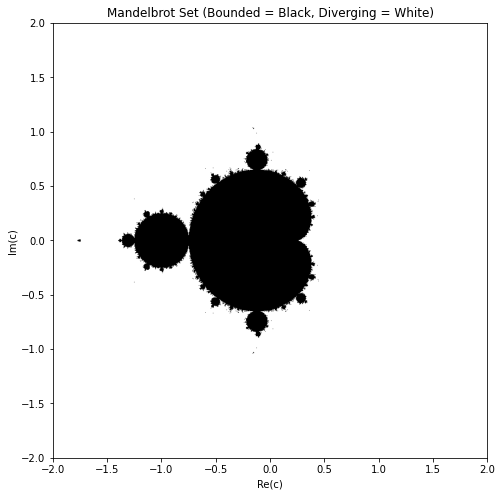

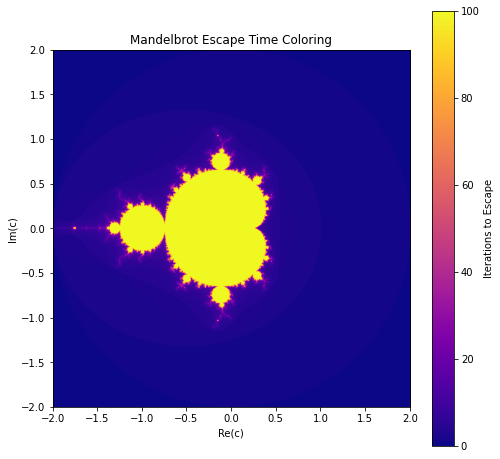

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from iterationfunc import iteration

# Parameters
width, height = 800, 800
x_min, x_max = -2, 2
y_min, y_max = -2, 2
max_iter = 100

# Generate a grid of complex numbers
x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
C = x[np.newaxis, :] + 1j * y[:, np.newaxis]

# Arrays to store results
divergence = np.zeros(C.shape, dtype=int)
mask = np.zeros(C.shape, dtype=bool)

# Iterate over the grid and apply the iteration function
for i in range(height):
    for j in range(width):
        n_iter = iteration(C[i, j], max_iter)
        divergence[i, j] = n_iter
        mask[i, j] = n_iter == max_iter

# Image 1: black for bounded points, white for diverging points
plt.figure(figsize=(8, 8))
plt.imshow(mask, extent=[x_min, x_max, y_min, y_max], cmap='binary')
plt.title('Mandelbrot Set (Bounded = Black, Diverging = White)')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.savefig('mandelbrot_1.pdf')
plt.show()

# Image 2: color scale indicating the iteration at which divergence occurred
plt.figure(figsize=(8, 8))
plt.imshow(divergence, extent=[x_min, x_max, y_min, y_max], cmap='plasma', interpolation='bilinear')
plt.title('Mandelbrot Escape Time Coloring')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label='Iterations to Escape')
plt.savefig('mandelbrot_2.pdf')
plt.show()
